In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import dataset as ds
from matplotlib.patches import Patch

In [ ]:
path = "./data"
ds = ds.DFC20(path, subset="train", use_s1=False, use_s2_RGB=False, use_s2_hr=False, use_s2_all=True, as_tensor=False)
ds.__len__()

[Load]: 100%|██████████| 4754/4754 [00:00<00:00, 105680.10it/s]

loaded 4754 samples from the DFC20 subset train


4754

In [14]:
img = ds.__getitem__(1)['image']
print(img.shape)
sum_img = np.sum(img, axis=(1, 2))  # Sum over height and width (axis 1 and 2)
sum_sq_img = np.sum(img**2, axis=(1, 2))  # Sum of squared pixel values
sum_img

(13, 256, 256)


array([89746590., 71175560., 55347010., 46183530., 44025788., 42829110.,
       42909830., 37724452., 41580960., 16012971.,   406232., 33433124.,
       28542206.], dtype=float32)

MEAN STD

In [15]:

# Initialize variables to store the running sum and square sum for calculating mean and std
sum_img = np.zeros((13,))  # Running sum for each band
sum_sq_img = np.zeros((13,))  # Running sum of squares for each band
num_pixels = 0

for i in range(ds.__len__()):
    img = ds.__getitem__(i)['image']
    #print(img.shape)
    sum_img += np.sum(img, axis=(1, 2))  # Sum over height and width (axis 1 and 2)
    sum_sq_img += np.sum(img**2, axis=(1, 2))  # Sum of squared pixel values

    # Increment number of pixels processed
    num_pixels += 65536  # 256*256

# Now calculate the global mean and std for each band
mean = sum_img / num_pixels  # Mean for each band
std = np.sqrt((sum_sq_img / num_pixels) - mean**2)  # Standard deviation for each band
#mean[None, None, :]

In [ ]:
print(mean)
print(std)

[1275.56366148 1038.57734603  949.87916508  814.60094421 1049.14282086
 1747.35075034 2033.31146565 1991.47800801 2195.7438094   800.6378601
   12.03797621 1521.99609528  970.35119174]
[ 203.10924668  269.65614201  309.13105797  482.80072872  490.52968804
  928.52246598 1171.08680903 1181.02514416 1297.94465422  500.73809154
    7.11942405  990.00070073  765.27917928]


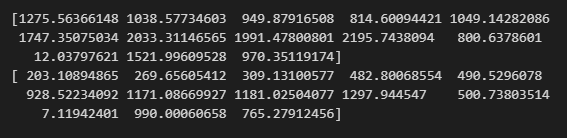

In [ ]:
bands_mean_train = {'s1_mean': [0, 0],
                    's2_mean': [1275.56366148,1038.57734603,949.87916508,814.60094421,1049.14282086,1747.35075034,
                                2033.31146565,1991.47800801,2195.7438094,800.6378601,12.03797621,1521.99609528,970.35119174]}

bands_std_train = {'s1_mean': [0, 0],
                   's2_mean': [ 203.10894865,269.65605412,309.13100577,482.80068554,490.5296078,928.52234092,1171.08669927,
                               1181.02504077,1297.944547,500.73803514,7.11942401,990.00060658,765.27912456]}

MIN MAX

In [5]:
# Initialize min and max values for each band
min_img = np.full((13,), np.inf)  # Start with large values
max_img = np.full((13,), -np.inf)  # Start with small values

for i in range(len(ds)):
    img = ds.__getitem__(i)['image']  # Get image (shape: 13, 256, 256)
    
    # Compute per-band min and max
    min_img = np.minimum(min_img, np.min(img, axis=(1, 2)))
    max_img = np.maximum(max_img, np.max(img, axis=(1, 2)))

print("Min per band:", min_img)
print("Max per band:", max_img)

Min per band: [5.66999987e-02 9.99999975e-05 9.99999975e-05 9.99999975e-05
 9.99999975e-05 9.99999975e-05 9.99999975e-05 9.99999975e-05
 9.99999975e-05 9.99999975e-05 9.99999975e-05 3.00000014e-04
 9.99999975e-05]
Max per band: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.14229999 1.
 1.        ]
